<a href="https://colab.research.google.com/github/MaikarfiJesse/Housing_model_ML/blob/main/ml_pipeline_%5BJesse_Maikarfi%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: HouseP- Predicting House Rent

## Student Name: Jesse Maikarfi

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   
   **Link to dataset - https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset**

   **For the HouseP project, data was analyzed from various real estate websites and Lagos real estate market analysis reports.**
   
   **Link to additional information - https://jimorealestate.com/the-current-state-of-lagos-real-estate-market/**
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

**Given the diversity of data sources, aggregation is necessary to build a comprehensive dataset that accurately reflects the Lagos housing market. This process consolidates data points like rent prices, location details, property features, and historical rent changes from these varied sources.**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Current Format: The collected data varies in format, including CSV files.
Transformation: All data will be transformed into a unified CSV format to simplify analysis and modeling. This process includes standardizing column names, ensuring consistent data types, and converting text-based location data into geographical coordinates.**

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.

   **Features: The dataset includes bedrooms,bathrooms, toilets, parking_space, title, town, state, price.**

**EDA Findings: Preliminary EDA will focus on understanding price distributions, identifying correlations between features and prices, and detecting outliers or anomalies in the data.**
   
  **Insert code for data exploration below**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/content/sample_data/nigeria_houses_data.csv')

Dataset Head:
   bedrooms  bathrooms  toilets  parking_space                 title     town  \
0       6.0        5.0      5.0            4.0       Detached Duplex  Mabushi   
1       4.0        5.0      5.0            4.0     Terraced Duplexes  Katampe   
2       4.0        5.0      5.0            4.0       Detached Duplex    Lekki   
3       4.0        4.0      5.0            6.0       Detached Duplex     Ajah   
4       4.0        4.0      5.0            2.0  Semi Detached Duplex    Lekki   

   state        price  
0  Abuja  450000000.0  
1  Abuja  800000000.0  
2  Lagos  120000000.0  
3  Lagos   40000000.0  
4  Lagos   75000000.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking

<ipython-input-11-80f022631392>:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


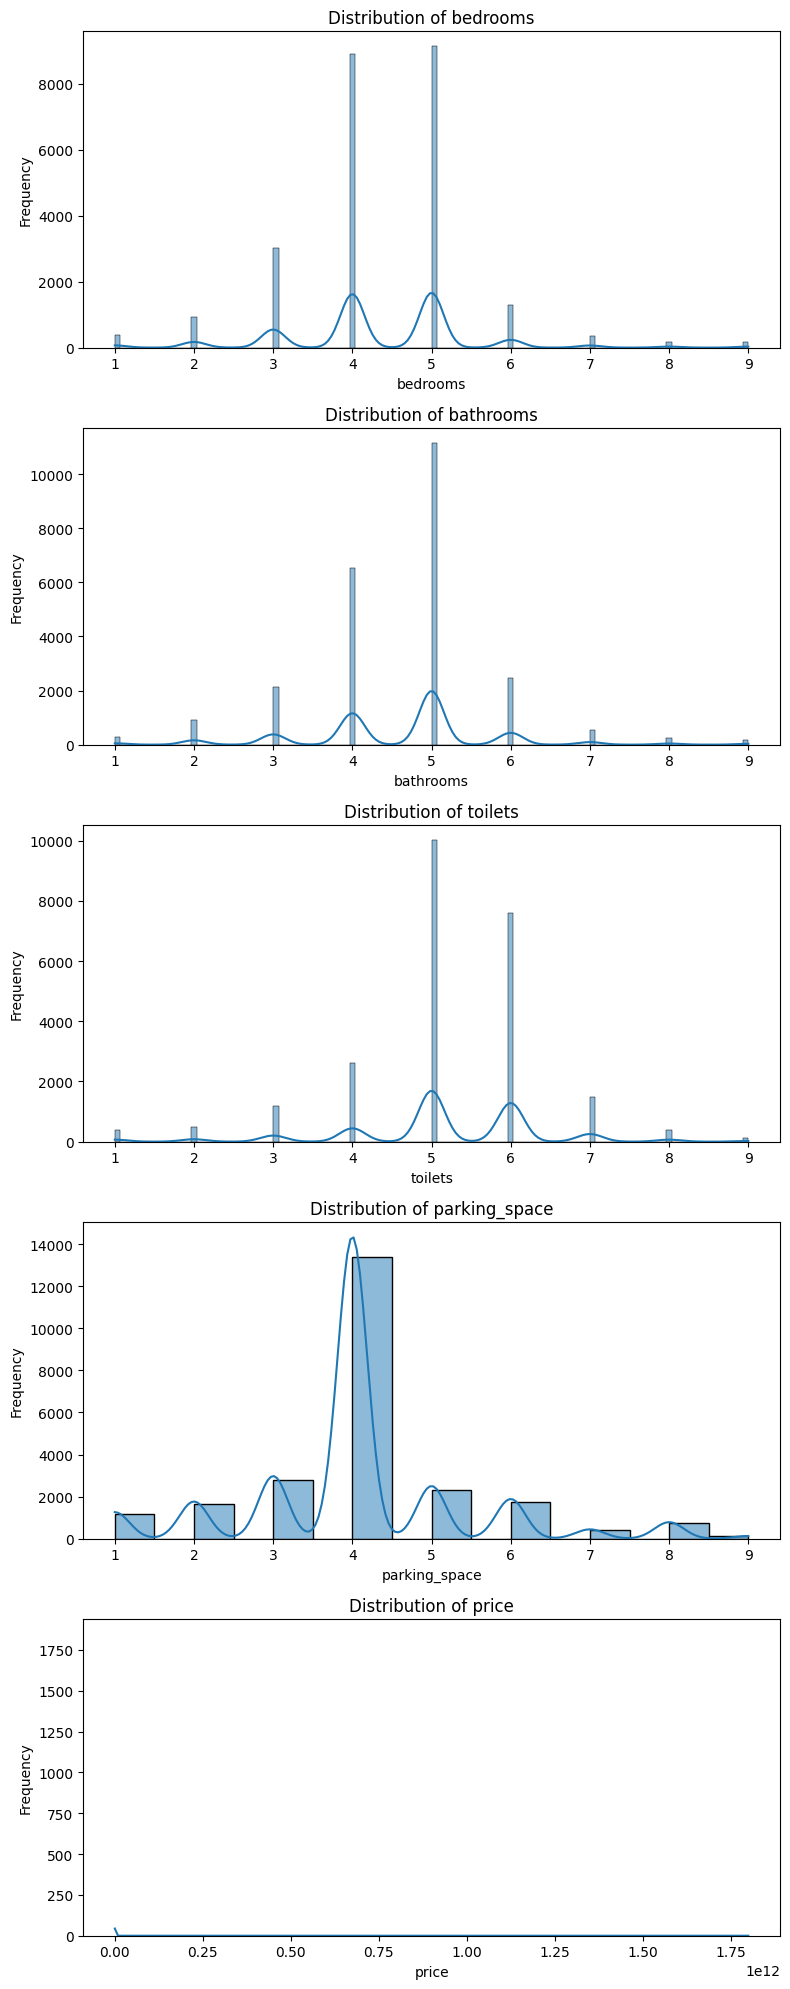

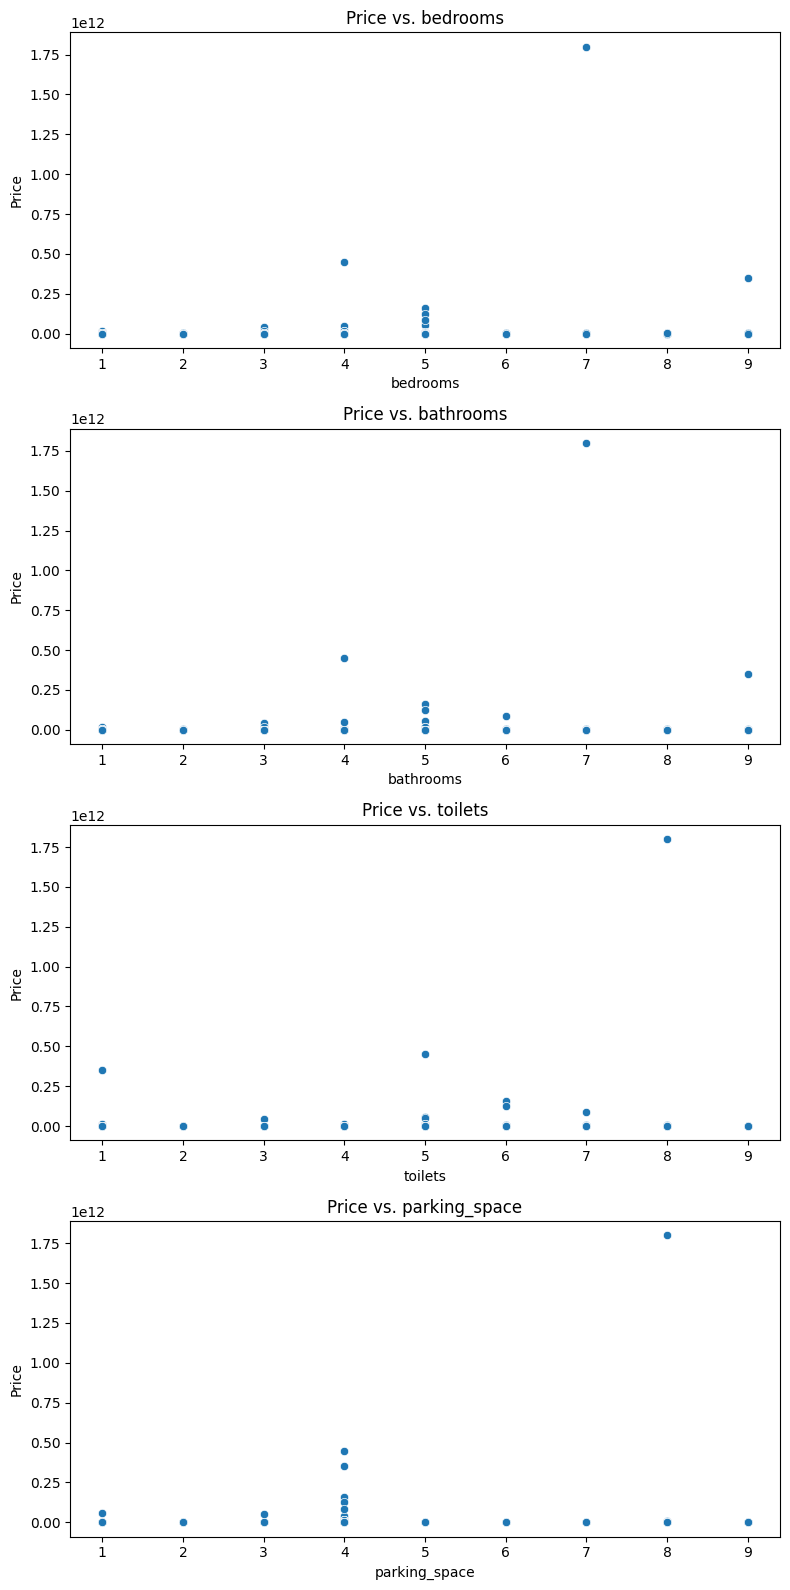

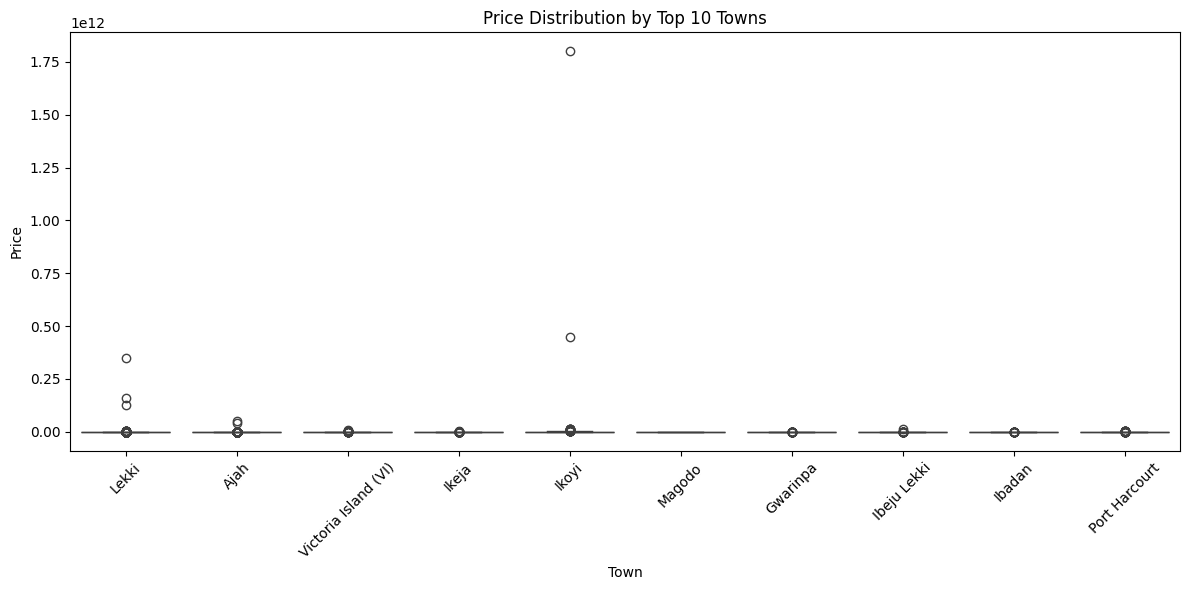

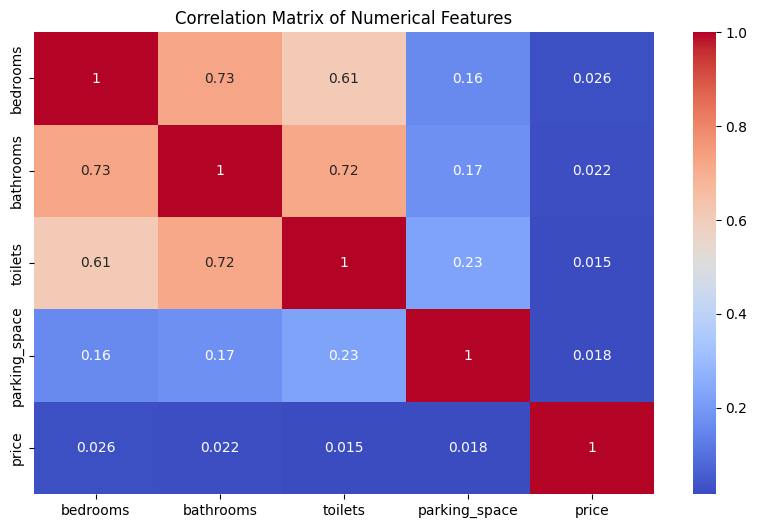

In [ ]:
# Overview of the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

# Distribution of numerical features
numerical_features = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']
fig, axs = plt.subplots(len(numerical_features), figsize=(8, 4 * len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
plt.tight_layout()

# Price relationship with numerical features
fig, axs = plt.subplots(len(numerical_features)-1, figsize=(8, 4 * (len(numerical_features)-1)))
for i, feature in enumerate(numerical_features[:-1]):  # Exclude 'price' itself
    sns.scatterplot(x=feature, y='price', data=data, ax=axs[i])
    axs[i].set_title(f'Price vs. {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')
plt.tight_layout()

# Boxplot for price distribution across towns (top 10 for simplicity)
top_towns = data['town'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='town', y='price', data=data[data['town'].isin(top_towns)])
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 10 Towns')
plt.xlabel('Town')
plt.ylabel('Price')
plt.tight_layout()

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Hypotheses: The number of bedrooms significantly affects the price of a house.**

  **Testing: To test this, a linear regression analysis is done where price is the dependent variable and bedrooms is the independent variable. This will allow us to see if there's a statistically significant relationship between the number of bedrooms and the house price.**

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Density Assessment: Initial data inspection will identify sparse features and outliers.**
  **Strategies: Depending on context, missing data will be handled through imputation or exclusion. Outliers will be assessed for authenticity and either corrected or removed.**

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [ ]:
# Identifying missing values
# print(data.isnull().sum())

# Simple imputation for missing values (you can adjust the strategy as needed)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['toilets'].fillna(data['toilets'].median(), inplace=True)
data['parking_space'].fillna(data['parking_space'].median(), inplace=True)

# Identifying and handling outliers in 'price'
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data_filtered = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]

# Alternatively, cap outliers
data['price'] = np.where(data['price'] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, data['price'])
data['price'] = np.where(data['price'] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, data['price'])
print(data.isnull().sum())


bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64


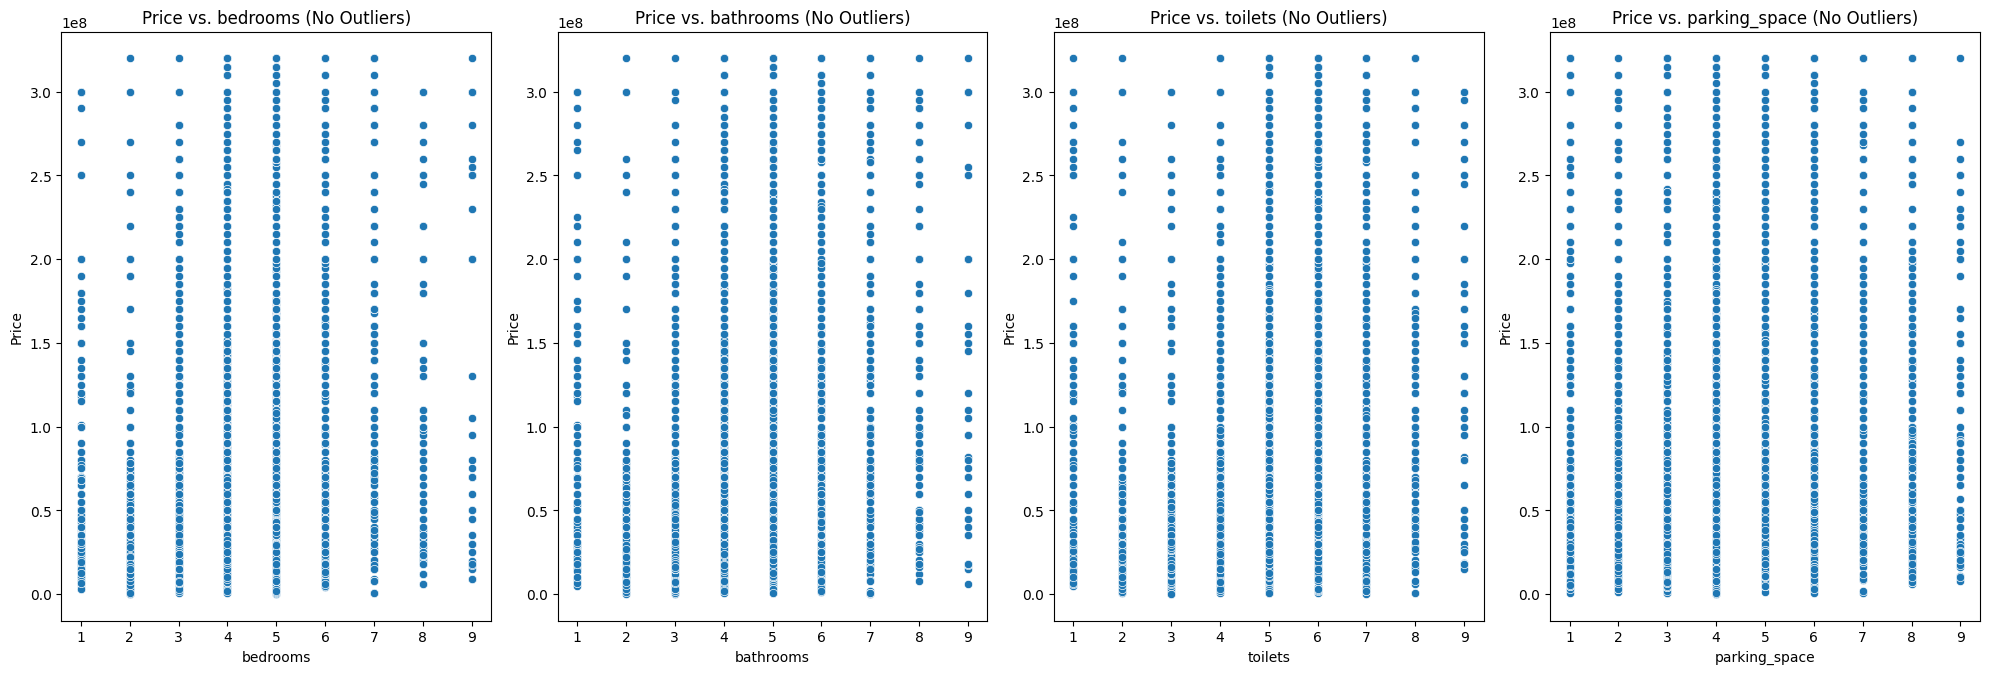

In [ ]:
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Applying the function to the 'price' column
# data_no_outliers = remove_outliers(data, 'price')

# Visualization of relationships between 'price' and other numerical features without outliers
numerical_features = ['bedrooms', 'bathrooms', 'toilets', 'parking_space']

fig, axs = plt.subplots(1, len(numerical_features), figsize=(20, 7))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='price', data=data_no_outliers, ax=axs[i])
    axs[i].set_title(f'Price vs. {feature} (No Outliers)')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

  **The dataset will be randomly split into 70% training, 15% validation, and 15% testing sets, ensuring that the distribution of key features like location and property type is consistent across all sets.**

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.

   **Techniques such as ensuring geographic diversity in the data and analyzing rent price distributions across different property types will be used to identify and mitigate potential biases.**
   
    **Your answer for Hypothesis Testing goes here **



In [ ]:
# Assuming 'price' is the target variable and the rest are features
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

from sklearn.model_selection import train_test_split

# First split: Separating the dataset into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Dividing the temporary set equally into validation and test sets (15% each of the original dataset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Printing the sizes of each dataset to verify the splits
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%) Shape: {X_train.shape}")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.2f}%) shape: {X_val.shape}")
print(f"Testing set size: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%) Shape: {X_test.shape}")

Training set size: 17028 (70.00%) Shape: (17028, 7)
Validation set size: 3649 (15.00%) shape: (3649, 7)
Testing set size: 3649 (15.00%) Shape: (3649, 7)


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.
   
  **Relevant features will include bedrooms,bathrooms, toilets, parking_space, title, town, state, price. Feature significance will be evaluated through correlation analysis and feature importance metrics from initial model runs.**

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.

   **The dataset contains both categorical (property type, amenities) and numerical (rent price, number of bedrooms) data.**
   - Plan preprocessing steps for each data type.

**Categorical data will be encoded using one-hot encoding, while numerical data will be normalized or standardized as required.**
   [**insert text for preprocessing steps**]


<ipython-input-36-51b104c6b64c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_towns['price'] = np.log(data_top_towns['price'] + 1)


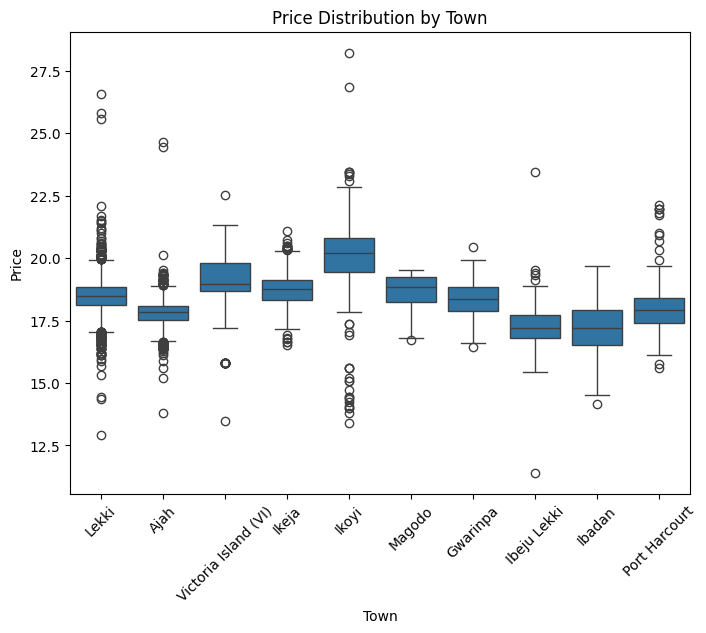

In [ ]:
# Visualizing price by town (considering the top 10 towns for simplicity)
top_towns = data['town'].value_counts().head(10).index
data_top_towns = data[data['town'].isin(top_towns)]

plt.figure(figsize=(8, 6))

# Applying a log transformation to 'price' for visualization
# Note: Adding a small value to avoid log(0)
data_top_towns['price'] = np.log(data_top_towns['price'] + 1)

sns.boxplot(x='town', y='price', data=data_top_towns)
plt.xticks(rotation=45)
plt.title('Price Distribution by Town')
plt.xlabel('Town')

# Adjusting the y-axis label to reflect the transformation
plt.ylabel('Price')
plt.show()


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.
  
  **Raw data will be transformed using the preprocessing steps mentioned above**

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

**Processed data will be stored in a cloud-based SQL database, ensuring easy accessibility and security. Backup and versioning strategies will be implemented to safeguard against data loss.**

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'price' is the target variable
X = data.drop('price', axis=1)  # Features without the target
y = data['price']  # Target variable

# Splitting the dataset into training (70%), and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further splitting the temporary set into validation and test sets (50% of temp each, 15% of total each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Before scaling
print("Before Scaling:")
# print(X_train.head())
print(X_train[:1])

# Initializing the Min-Max Scaler
scaler = MinMaxScaler()

# Fitting the scaler to the training data only
scaler.fit(X_train)

# Transforming the training data
X_train_scaled = scaler.transform(X_train)

# Creating a DataFrame for the scaled training data for easy viewing
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# After scaling
print("\nAfter Scaling:")
print(X_train_scaled[:1])

Before Scaling:
   bedrooms  bathrooms  toilets  parking_space
2         4          4        2              2

After Scaling:
[[0.66666667 1.         0.         0.5       ]]
